Epoch 0 loss: 0.326
Epoch 10 loss: 0.257
Epoch 20 loss: 0.251
Epoch 30 loss: 0.251
Epoch 40 loss: 0.251
Epoch 50 loss: 0.251
Epoch 60 loss: 0.251
Epoch 70 loss: 0.251
Epoch 80 loss: 0.251
Epoch 90 loss: 0.250
Epoch 100 loss: 0.250
Epoch 110 loss: 0.250
Epoch 120 loss: 0.250
Epoch 130 loss: 0.250
Epoch 140 loss: 0.250
Epoch 150 loss: 0.250
Epoch 160 loss: 0.250
Epoch 170 loss: 0.250
Epoch 180 loss: 0.250
Epoch 190 loss: 0.250
Epoch 200 loss: 0.250
Epoch 210 loss: 0.250
Epoch 220 loss: 0.250
Epoch 230 loss: 0.250
Epoch 240 loss: 0.250
Epoch 250 loss: 0.250
Epoch 260 loss: 0.250
Epoch 270 loss: 0.250
Epoch 280 loss: 0.250
Epoch 290 loss: 0.250
Epoch 300 loss: 0.250
Epoch 310 loss: 0.250
Epoch 320 loss: 0.250
Epoch 330 loss: 0.250
Epoch 340 loss: 0.250
Epoch 350 loss: 0.250
Epoch 360 loss: 0.250
Epoch 370 loss: 0.250
Epoch 380 loss: 0.250
Epoch 390 loss: 0.250
Epoch 400 loss: 0.250
Epoch 410 loss: 0.249
Epoch 420 loss: 0.249
Epoch 430 loss: 0.249
Epoch 440 loss: 0.249
Epoch 450 loss: 0.249

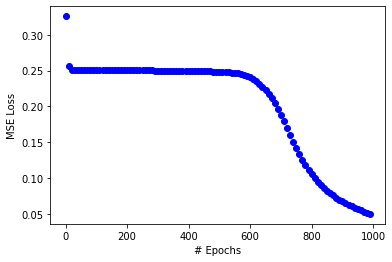

In [1]:
'''
********************************************************************
* Program: hw1.py                                            
* Coded by: Michael Hsieh                                                      
* Date: Feb 12 2021
*                                                                  
* References: https://victorzhou.com/blog/intro-to-neural-networks/
* Notes: 
* 1. A NN with one input layer, one hidden layer, and one output layer, 
* as 2-2-1 feed forward architecture.
* 2. Initialized all biases and weights to 0.5
* 3. The loss function was plotted with Matplotlib.
* 4. The input data is predicted to belong to class 1 = C2.                            
********************************************************************
'''
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  '''
  def __init__(self):
    # Weights
    self.w1 = 0.5 # np.random.normal()
    self.w2 = 0.5 # np.random.normal()
    self.w3 = 0.5 # np.random.normal()
    self.w4 = 0.5 # np.random.normal()
    self.w5 = 0.5 # np.random.normal()
    self.w6 = 0.5 # np.random.normal()

    # Biases
    self.b1 = 0.5 # np.random.normal()
    self.b2 = 0.5 # np.random.normal()
    self.b3 = 0.5 # np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

        # Plot x = epoch and y = loss
        # using blue circle markers
        plt.plot(epoch, loss, "bo") 
        plt.xlabel("# Epochs")
        plt.ylabel("MSE Loss")

# Define dataset
data = np.array([
  [0.3, 0.457],  # C1
  [1.1, 2.37],   # C1
  [4.57, 5.55],   # C1
  [0.5, 0.34], # C2
  [1.45, 1.11], # C2
  [4.78, 4.44], # C2
])

# 0 = class C1, 1 = class C2
all_y_trues = np.array([
  0, # C1
  0, # C1
  0, # C1
  1, # C2
  1, # C2
  1 # C2
])

# Train our neural network
network = OurNeuralNetwork()
network.train(data, all_y_trues)

# network = OurNeuralNetwork()
# input data (3.32, 3.01), find which class, C1 or C2, input data belongs to
x = np.array([3.32, 3.01])
print("predicted class: %.3f" % network.feedforward(x)) # 0.8663075199789684 - C2